In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py

np.random.seed(1)

In [105]:
def zero_pad(X,pad):
    X_pad=np.pad(X,((0,0),(pad,pad),(pad,pad),(0,0)),mode='constant',constant_values=(0,0))
    return X_pad

x.shape =
 (4, 3, 3, 2)
x_pad.shape =
 (4, 7, 7, 2)
x[1,1] =
 [[ 0.90085595 -0.68372786]
 [-0.12289023 -0.93576943]
 [-0.26788808  0.53035547]]
x_pad[1,1] =
 [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


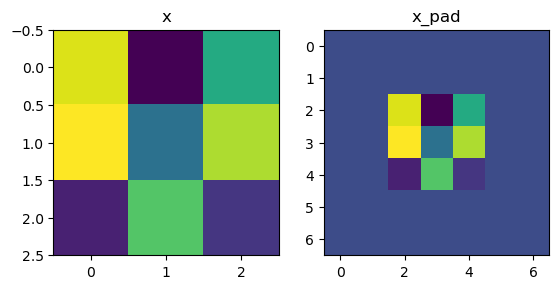

In [106]:
np.random.seed(1)
x=np.random.randn(4,3,3,2)
x_pad=zero_pad(x,2)

print("x.shape =\n",x.shape)
print('x_pad.shape =\n',x_pad.shape)

print('x[1,1] =\n',x[1,1])
print('x_pad[1,1] =\n',x_pad[1,1])

fig,ax=plt.subplots(1,2)
ax[0].set_title('x')
ax[0].imshow(x[0,:,:,0])
ax[1].imshow(x_pad[0,:,:,0])
ax[1].set_title('x_pad')
plt.show()

In [107]:
def conv_single_layer(a_slice_prev,W,b):
    s=np.multiply(a_slice_prev,W)
    z=np.sum(s)
    z+=np.squeeze(b)
    return z

In [108]:
np.random.seed(1)
a_slice_prev=np.random.randn(4,4,3)
W=np.random.randn(4,4,3)
b=np.random.randn(1,1,1)
Z=conv_single_layer(a_slice_prev,W,b)
print('Z =',Z)

Z = -6.999089450680221


In [109]:
def conv_forward(A_prev,W,b,hparameters):
    stride=hparameters['stride']
    pad=hparameters['pad']

    A_prev_pad=zero_pad(A_prev,pad)
    m=A_prev.shape[0]
    n_h_prev=A_prev.shape[1]
    n_w_prev=A_prev.shape[2]
    n_c_prev=A_prev.shape[3]
    
    f_h=W.shape[0]
    f_w=W.shape[1]
    
    
    
    n_h=(n_h_prev+2*pad-f_h)//stride+1
    n_w=(n_w_prev+2*pad-f_w)//stride+1
    n_c=W.shape[3]
    
    Z=np.zeros((m,n_h,n_w,n_c))
    for i in range(m):
        a_prev=A_prev_pad[i]
        for j in range(n_h):
            ver_start=j*stride
            ver_end=j*stride+f_h
            for k in range(n_w):
                hor_start=k*stride
                hor_end=k*stride+f_w
                for c in range(n_c):
                    Z[i,j,k,c]=conv_single_layer(a_prev[ver_start:ver_end,hor_start:hor_end],W[:,:,:,c],b[:,:,:,c])

    assert(Z.shape==(m,n_h,n_w,n_c))
    cache=(A_prev,W,b,hparameters)
    return Z,cache

In [110]:
np.random.seed(1)
A_prev = np.random.randn(10,5,7,4)
W = np.random.randn(3,3,4,8)
b = np.random.randn(1,1,1,8)
hparameters = {"pad" : 1,
               "stride": 2}

Z, cache_conv = conv_forward(A_prev, W, b, hparameters)
print("Z's mean =\n", np.mean(Z))
print("Z[3,2,1] =\n", Z[3,2,1])
print("cache_conv[0][1][2][3] =\n", cache_conv[0][1][2][3])

Z's mean =
 0.6923608807576933
Z[3,2,1] =
 [-1.28912231  2.27650251  6.61941931  0.95527176  8.25132576  2.31329639
 13.00689405  2.34576051]
cache_conv[0][1][2][3] =
 [-1.1191154   1.9560789  -0.3264995  -1.34267579]


In [111]:
def pool_forward(A_prev,hparameters,mode='max'):
    (m,n_h_prev,n_w_prev,n_c_prev)=A_prev.shape
    stride=hparameters['stride']
    f=hparameters['f']
    n_h=(n_h_prev-f)//stride+1
    n_w=(n_w_prev-f)//stride+1

    Z=np.zeros((m,n_h,n_w,n_c_prev))
    for i in range(m):
        a_prev=A_prev[i]
        for j in range(n_h):
            ver_start=stride*j
            ver_end=ver_start+f
            for k in range(n_w):
                hor_start=stride*k
                hor_end=hor_start+f
                for c in range(n_c_prev):
                    if(mode=='max'):
                        Z[i,j,k,c]=np.max(a_prev[ver_start:ver_end,hor_start:hor_end,c])
                    elif(mode=='average'):
                        Z[i,j,k,c]=np.mean(a_prev[ver_start:ver_end,hor_start:hor_end,c])

    cache=(A_prev,hparameters)
    return Z,cache

In [112]:
np.random.seed(1)
A_prev = np.random.randn(2, 5, 5, 3)
hparameters = {"stride" : 1, "f": 3}

A, cache = pool_forward(A_prev, hparameters)
print("mode = max")
print("A.shape = " + str(A.shape))
print("A =\n", A)
print()
A, cache = pool_forward(A_prev, hparameters, mode = "average")
print("mode = average")
print("A.shape = " + str(A.shape))
print("A =\n", A)

np.random.seed(1)
A_prev = np.random.randn(2, 5, 5, 3)
hparameters = {"stride" : 2, "f": 3}

A, cache = pool_forward(A_prev, hparameters)
print("mode = max")
print("A.shape = " + str(A.shape))
print("A =\n", A)
print()

A, cache = pool_forward(A_prev, hparameters, mode = "average")
print("mode = average")
print("A.shape = " + str(A.shape))
print("A =\n", A)

mode = max
A.shape = (2, 3, 3, 3)
A =
 [[[[1.74481176 0.90159072 1.65980218]
   [1.74481176 1.46210794 1.65980218]
   [1.74481176 1.6924546  1.65980218]]

  [[1.14472371 0.90159072 2.10025514]
   [1.14472371 0.90159072 1.65980218]
   [1.14472371 1.6924546  1.65980218]]

  [[1.13162939 1.51981682 2.18557541]
   [1.13162939 1.51981682 2.18557541]
   [1.13162939 1.6924546  2.18557541]]]


 [[[1.19891788 0.84616065 0.82797464]
   [0.69803203 0.84616065 1.2245077 ]
   [0.69803203 1.12141771 1.2245077 ]]

  [[1.96710175 0.84616065 1.27375593]
   [1.96710175 0.84616065 1.23616403]
   [1.62765075 1.12141771 1.2245077 ]]

  [[1.96710175 0.86888616 1.27375593]
   [1.96710175 0.86888616 1.23616403]
   [1.62765075 1.12141771 0.79280687]]]]

mode = average
A.shape = (2, 3, 3, 3)
A =
 [[[[-3.01046719e-02 -3.24021315e-03 -3.36298859e-01]
   [ 1.43310483e-01  1.93146751e-01 -4.44905196e-01]
   [ 1.28934436e-01  2.22428468e-01  1.25067597e-01]]

  [[-3.81801899e-01  1.59993515e-02  1.70562706e-01]
   [

In [113]:
def conv_backward(dZ,cache):
    (A_prev,W,b,hparameters)=cache
    (m,n_h_prev,n_w_prev,n_c_prev)=A_prev.shape
    (f_h,f_w,n_c_prev,n_c)=W.shape
    stride=hparameters['stride']
    pad=hparameters['pad']

    (m,n_h,n_w,n_c)=dZ.shape
    dA_prev=np.zeros((m,n_h_prev,n_w_prev,n_c_prev))
    dW=np.zeros((f_h,f_w,n_c_prev,n_c))
    db=np.zeros((1,1,1,n_c))

    A_prev_pad=zero_pad(A_prev,pad)
    dA_prev_pad=zero_pad(dA_prev,pad)

    for i in range(m):
        a_prev_pad=A_prev_pad[i]
        da_prev_pad=dA_prev_pad[i]
        for j in range(n_h):
            ver_start=stride*j
            ver_end=ver_start+f_h
            for k in range(n_w):
                hor_start=k*stride
                hor_end=hor_start+f_w
                for c in range(n_c):
                    a_slice=a_prev_pad[ver_start:ver_end,hor_start:hor_end,:]
                    da_prev_pad[ver_start:ver_end,hor_start:hor_end,:]+=W[:,:,:,c]*dZ[i,j,k,c]
                    dW[:,:,:,c]+=a_slice*dZ[i,j,k,c]
                    db[:,:,:,c]+=dZ[i,j,k,c]
        
        if pad != 0:
            dA_prev[i,:,:,:] = da_prev_pad[pad:-pad, pad:-pad, :]
        else:
            dA_prev[i,:,:,:] = da_prev_pad

        
    return dA_prev,dW,db

In [114]:
np.random.seed(1)
A_prev = np.random.randn(10, 4, 4, 3)
W = np.random.randn(2, 2, 3, 8)
b = np.random.randn(1, 1, 1, 8)
hparameters = {"pad" : 2,
               "stride": 2}
Z, cache_conv = conv_forward(A_prev, W, b, hparameters)
dA, dW, db = conv_backward(Z, cache_conv)

print("dA_mean =", np.mean(dA))
print("dW_mean =", np.mean(dW))
print("db_mean =", np.mean(db))

assert type(dA) == np.ndarray, "Output must be a np.ndarray"
assert type(dW) == np.ndarray, "Output must be a np.ndarray"
assert type(db) == np.ndarray, "Output must be a np.ndarray"
assert dA.shape == (10, 4, 4, 3), f"Wrong shape for dA  {dA.shape} != (10, 4, 4, 3)"
assert dW.shape == (2, 2, 3, 8), f"Wrong shape for dW {dW.shape} != (2, 2, 3, 8)"
assert db.shape == (1, 1, 1, 8), f"Wrong shape for db {db.shape} != (1, 1, 1, 8)"
assert np.isclose(np.mean(dA), 1.4524377), "Wrong values for dA"
assert np.isclose(np.mean(dW), 1.7269914), "Wrong values for dW"
assert np.isclose(np.mean(db), 7.8392325), "Wrong values for db"

dA_mean = 1.4524377775388075
dW_mean = 1.7269914583139097
db_mean = 7.839232564616838


In [115]:
def create_mask_from_window(x):
    mask=(x==np.max(x))
    return mask

In [116]:
np.random.seed(1)
x = np.random.randn(2, 3)
mask = create_mask_from_window(x)
print('x = ', x)
print("mask = ", mask)

x = np.array([[-1, 2, 3],
              [2, -3, 2],
              [1, 5, -2]])

y = np.array([[False, False, False],
     [False, False, False],
     [False, True, False]])
mask = create_mask_from_window(x)

assert type(mask) == np.ndarray, "Output must be a np.ndarray"
assert mask.shape == x.shape, "Input and output shapes must match"
assert np.allclose(mask, y), "Wrong output. The True value must be at position (2, 1)"

x =  [[ 1.62434536 -0.61175641 -0.52817175]
 [-1.07296862  0.86540763 -2.3015387 ]]
mask =  [[ True False False]
 [False False False]]


In [117]:
def distribute_value(dz,shape):
    (n_h,n_w)=shape
    average=np.prod(shape)
    a=(dz/average)*np.ones(shape)
    return a

In [118]:
a = distribute_value(2, (2, 2))
print('distributed value =', a)


assert type(a) == np.ndarray, "Output must be a np.ndarray"
assert a.shape == (2, 2), f"Wrong shape {a.shape} != (2, 2)"
assert np.sum(a) == 2, "Values must sum to 2"

a = distribute_value(100, (10, 10))
assert type(a) == np.ndarray, "Output must be a np.ndarray"
assert a.shape == (10, 10), f"Wrong shape {a.shape} != (10, 10)"
assert np.sum(a) == 100, "Values must sum to 100"

distributed value = [[0.5 0.5]
 [0.5 0.5]]


In [119]:
def pool_backward(dA,cache,mode='max'):
    (A_prev,hparameters)=cache
    (m,n_h_prev,n_w_prev,n_c_prev)=A_prev.shape
    (m,n_h,n_w,n_c)=dA.shape
    stride=hparameters['stride']
    f=hparameters['f']
    dA_prev=np.zeros(A_prev.shape)
    for i in range(m):
        a_prev=A_prev[i,:,:,:]
        for j in range(n_h):
            ver_start=j*stride
            ver_end=ver_start+f
            for k in range(n_w):
                hor_start=k*stride
                hor_end=hor_start+f
                for c in range(n_c):
                    if(mode=='max'):
                        a_prev_slice=a_prev[ver_start:ver_end,hor_start:hor_end,c]
                        mask=create_mask_from_window(a_prev_slice)
                        dA_prev[i,ver_start:ver_end,hor_start:hor_end,c]+=mask*dA[i,j,k,c]
                    elif(mode=='average'):
                        da=dA[i,j,k,c]
                        shape=(f,f)
                        dA_prev[i, ver_start: ver_end, hor_start: hor_end, c] += distribute_value(da, shape)
    assert(dA_prev.shape == A_prev.shape)
    
    return dA_prev

In [120]:
np.random.seed(1)
A_prev = np.random.randn(5, 5, 3, 2)
hparameters = {"stride" : 1, "f": 2}
A, cache = pool_forward(A_prev, hparameters)
print(A.shape)
print(cache[0].shape)
dA = np.random.randn(5, 4, 2, 2)

dA_prev1 = pool_backward(dA, cache, mode = "max")
print("mode = max")
print('mean of dA = ', np.mean(dA))
print('dA_prev1[1,1] = ', dA_prev1[1, 1])  
print()
dA_prev2 = pool_backward(dA, cache, mode = "average")
print("mode = average")
print('mean of dA = ', np.mean(dA))
print('dA_prev2[1,1] = ', dA_prev2[1, 1]) 

assert type(dA_prev1) == np.ndarray, "Wrong type"
assert dA_prev1.shape == (5, 5, 3, 2), f"Wrong shape {dA_prev1.shape} != (5, 5, 3, 2)"
assert np.allclose(dA_prev1[1, 1], [[0, 0], 
                                    [ 5.05844394, -1.68282702],
                                    [ 0, 0]]), "Wrong values for mode max"
assert np.allclose(dA_prev2[1, 1], [[0.08485462,  0.2787552], 
                                    [1.26461098, -0.25749373], 
                                    [1.17975636, -0.53624893]]), "Wrong values for mode average"

(5, 4, 2, 2)
(5, 5, 3, 2)
mode = max
mean of dA =  0.14571390272918056
dA_prev1[1,1] =  [[ 0.          0.        ]
 [ 5.05844394 -1.68282702]
 [ 0.          0.        ]]

mode = average
mean of dA =  0.14571390272918056
dA_prev2[1,1] =  [[ 0.08485462  0.2787552 ]
 [ 1.26461098 -0.25749373]
 [ 1.17975636 -0.53624893]]


In [144]:
# ===============================
# 1️⃣ MNIST & Fashion-MNIST LOADER
# ===============================
import numpy as np
from keras.datasets import mnist, fashion_mnist

def load_mnist(fashion=False):
    if fashion:
        (X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
    else:
        (X_train, y_train), (X_test, y_test) = mnist.load_data()

    X_train = X_train.astype(np.float32) / 255.0
    X_test  = X_test.astype(np.float32) / 255.0

    X_train = X_train[..., np.newaxis]   # (m,28,28,1)
    X_test  = X_test[..., np.newaxis]

    Y_train = np.eye(10)[y_train]
    Y_test  = np.eye(10)[y_test]

    return X_train, Y_train, X_test, Y_test


# ==================================
# 2️⃣ ACCURACY & CONFUSION MATRIX
# ==================================
def compute_accuracy(Y_hat, Y):
    preds = np.argmax(Y_hat, axis=1)
    labels = np.argmax(Y, axis=1)
    return np.mean(preds == labels)

def confusion_matrix(Y_hat, Y, num_classes=10):
    preds = np.argmax(Y_hat, axis=1)
    labels = np.argmax(Y, axis=1)
    cm = np.zeros((num_classes, num_classes), dtype=int)
    for t, p in zip(labels, preds):
        cm[t, p] += 1
    return cm


# ===========================
# 3️⃣ ADAM OPTIMIZER (SCRATCH)
# ===========================
def adam_initialize(parameters):
    v = {}
    s = {}
    for key in parameters:
        v[key] = np.zeros_like(parameters[key])
        s[key] = np.zeros_like(parameters[key])
    return v, s

def adam_update(parameters, grads, v, s, t,
                lr=0.001, beta1=0.9, beta2=0.999, eps=1e-8):

    for key in parameters:
        v[key] = beta1 * v[key] + (1 - beta1) * grads[key]
        v_corr = v[key] / (1 - beta1 ** t)

        s[key] = beta2 * s[key] + (1 - beta2) * (grads[key] ** 2)
        s_corr = s[key] / (1 - beta2 ** t)

        parameters[key] -= lr * v_corr / (np.sqrt(s_corr) + eps)

    return parameters


In [145]:
# ===========================
# 4️⃣ FLATTEN + FC + SOFTMAX
# ===========================

def flatten_forward(A):
    m = A.shape[0]
    F = A.reshape(m, -1)
    cache = A.shape
    return F, cache

def flatten_backward(dF, cache):
    return dF.reshape(cache)


def fc_forward(A_prev, W, b):
    Z = np.dot(A_prev, W) + b
    cache = (A_prev, W, b)
    return Z, cache

def fc_backward(dZ, cache):
    A_prev, W, b = cache
    dA_prev = np.dot(dZ, W.T)
    dW = np.dot(A_prev.T, dZ)
    db = np.sum(dZ, axis=0, keepdims=True)
    return dA_prev, dW, db


def relu_forward(Z):
    A = np.maximum(0, Z)
    cache = Z
    return A, cache

def relu_backward(dA, cache):
    Z = cache
    dZ = dA * (Z > 0)
    return dZ


def softmax(Z):
    Z_shift = Z - np.max(Z, axis=1, keepdims=True)
    expZ = np.exp(Z_shift)
    return expZ / np.sum(expZ, axis=1, keepdims=True)


def softmax_cross_entropy(Z, Y):
    m = Y.shape[0]
    A = softmax(Z)
    loss = -np.sum(Y * np.log(A + 1e-8)) / m
    dZ = (A - Y) / m
    return loss, dZ


In [146]:
# ===========================
# 5️⃣ LENET FORWARD + BACKWARD
# ===========================

def initialize_lenet():
    params = {
        "W1": np.random.randn(5,5,1,6)*0.1,
        "b1": np.zeros((1,1,1,6)),

        "W2": np.random.randn(5,5,6,16)*0.1,
        "b2": np.zeros((1,1,1,16)),

        # 16 feature maps of 4x4 after pooling
        "W3": np.random.randn(16*4*4,120)*0.1,
        "b3": np.zeros((1,120)),

        "W4": np.random.randn(120,84)*0.1,
        "b4": np.zeros((1,84)),

        "W5": np.random.randn(84,10)*0.1,
        "b5": np.zeros((1,10))
    }
    return params


def cnn_forward(X, params):
    Z1, c1 = conv_forward(X, params["W1"], params["b1"], {"pad":0,"stride":1})
    A1, r1 = relu_forward(Z1)
    P1, p1 = pool_forward(A1, {"stride":2,"f":2})

    Z2, c2 = conv_forward(P1, params["W2"], params["b2"], {"pad":0,"stride":1})
    A2, r2 = relu_forward(Z2)
    P2, p2 = pool_forward(A2, {"stride":2,"f":2})

    F, flat = flatten_forward(P2)

    Z3, fc3 = fc_forward(F, params["W3"], params["b3"])
    A3, r3 = relu_forward(Z3)

    Z4, fc4 = fc_forward(A3, params["W4"], params["b4"])
    A4, r4 = relu_forward(Z4)

    Z5, fc5 = fc_forward(A4, params["W5"], params["b5"])

    caches = (c1,r1,p1,c2,r2,p2,flat,fc3,r3,fc4,r4,fc5)
    return Z5, caches


def cnn_backward(dZ5, caches, params):
    (c1,r1,p1,c2,r2,p2,flat,fc3,r3,fc4,r4,fc5) = caches
    grads = {}

    dA4, grads["W5"], grads["b5"] = fc_backward(dZ5, fc5)
    dZ4 = relu_backward(dA4, r4)

    dA3, grads["W4"], grads["b4"] = fc_backward(dZ4, fc4)
    dZ3 = relu_backward(dA3, r3)

    dF, grads["W3"], grads["b3"] = fc_backward(dZ3, fc3)
    dP2 = flatten_backward(dF, flat)

    dA2 = pool_backward(dP2, p2)
    dZ2 = relu_backward(dA2, r2)
    dP1, grads["W2"], grads["b2"] = conv_backward(dZ2, c2)

    dA1 = pool_backward(dP1, p1)
    dZ1 = relu_backward(dA1, r1)
    _, grads["W1"], grads["b1"] = conv_backward(dZ1, c1)

    return grads


# ===========================
# 6️⃣ TRAINING LOOP (ADAM)
# ===========================

def train_cnn(X, Y, X_test, Y_test, epochs=10, lr=0.001, batch_size=32, print_every_step=True):
    params = initialize_lenet()
    v, s = adam_initialize(params)
    t = 0

    for epoch in range(epochs):
        perm = np.random.permutation(X.shape[0])
        X, Y = X[perm], Y[perm]

        batches = 0
        for i in range(0, X.shape[0], batch_size):
            Xb = X[i:i+batch_size]
            Yb = Y[i:i+batch_size]

            Z, caches = cnn_forward(Xb, params)
            loss, dZ = softmax_cross_entropy(Z, Yb)

            grads = cnn_backward(dZ, caches, params)
            t += 1
            params = adam_update(params, grads, v, s, t, lr)

            batches += 1
            if print_every_step:
                print(f"Epoch {epoch+1}, Step {batches}, Loss: {loss:.4f}")

        # optional: print test accuracy after each epoch
        Z_test, _ = cnn_forward(X_test, params)
        acc = compute_accuracy(Z_test, Y_test)
        print(f"Epoch {epoch+1} finished | Test Acc {acc:.4f}")

    return params



# ===========================
# 7️⃣ RUN MNIST / FASHION
# ===========================

X_train, Y_train, X_test, Y_test = load_mnist(fashion=False)
params = train_cnn(X_train, Y_train, X_test, Y_test, epochs=5)

Z_test, _ = cnn_forward(X_test, params)
cm = confusion_matrix(Z_test, Y_test)
print("Confusion Matrix:\n", cm)


Epoch 1, Step 1, Loss: 2.3116
Epoch 1, Step 2, Loss: 2.2687
Epoch 1, Step 3, Loss: 2.2572
Epoch 1, Step 4, Loss: 2.2265
Epoch 1, Step 5, Loss: 2.2425
Epoch 1, Step 6, Loss: 2.2687
Epoch 1, Step 7, Loss: 2.2162
Epoch 1, Step 8, Loss: 2.1537
Epoch 1, Step 9, Loss: 2.1605
Epoch 1, Step 10, Loss: 2.1176
Epoch 1, Step 11, Loss: 2.0858
Epoch 1, Step 12, Loss: 2.1120
Epoch 1, Step 13, Loss: 2.0276
Epoch 1, Step 14, Loss: 2.1063
Epoch 1, Step 15, Loss: 2.0009
Epoch 1, Step 16, Loss: 1.9492
Epoch 1, Step 17, Loss: 1.9206
Epoch 1, Step 18, Loss: 1.8810
Epoch 1, Step 19, Loss: 1.8148
Epoch 1, Step 20, Loss: 1.8804
Epoch 1, Step 21, Loss: 1.7581
Epoch 1, Step 22, Loss: 1.6105
Epoch 1, Step 23, Loss: 1.8089
Epoch 1, Step 24, Loss: 1.7005
Epoch 1, Step 25, Loss: 1.7022
Epoch 1, Step 26, Loss: 1.3943
Epoch 1, Step 27, Loss: 1.4955
Epoch 1, Step 28, Loss: 1.5160
Epoch 1, Step 29, Loss: 1.5021
Epoch 1, Step 30, Loss: 1.2038
Epoch 1, Step 31, Loss: 1.1742
Epoch 1, Step 32, Loss: 1.2686
Epoch 1, Step 33,

In [151]:

import matplotlib.pyplot as plt
import numpy as np

def plot_misclassified(X, y_true, y_pred, max_show=10):
    idx = np.where(y_true != y_pred)[0][:max_show]

    plt.figure(figsize=(12,4))
    for i, id in enumerate(idx):
        plt.subplot(1, max_show, i+1)
        plt.imshow(X[id].reshape(28,28), cmap='gray')
        plt.title(f"T:{y_true[id]} P:{y_pred[id]}")
        plt.axis('off')
    plt.show()


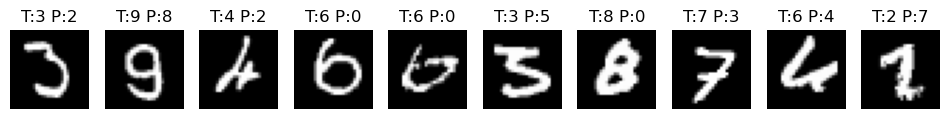

In [156]:
y_true = np.argmax(Y_test, axis=1) 
y_pred = np.argmax(Z_test, axis=1) 
plot_misclassified(X_test, y_true, y_pred)